In [4]:
import os
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams
from utils import plot_label
from mpl_toolkits.axes_grid1 import make_axes_locatable

rcParams.update({
    'image.cmap'     : 'gray',
    'axes.grid'      : False,
    'savefig.dpi'    : 300,  # to adjust notebook inline plot size
    'axes.labelsize' : 14,  # fontsize for x and y labels (was 10)
    'axes.titlesize' : 14,
    'font.size'      : 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'text.usetex'    : False
})

In [5]:
CLASS_NAMES = ["Basement", "SlopeMudA", "Deposit", "SlopeMudB", "SlopeValley", "Canyon"]
num_classes = len(CLASS_NAMES)

In [6]:
seg = "/nas/public/dataset/geophysics/BlindTestSEG/"
aicrowd = "/nas/home/fpicetti/datasets/aicrowd_facies/"

## Train dataset

In [7]:
img_seg = np.load(os.path.join(seg, "train_image.npy"), mmap_mode='r')
lbl_seg = np.load(os.path.join(seg, "train_labels.npy"), mmap_mode='r').astype(np.uint8)-1

img_aic = np.load(os.path.join(aicrowd, "data_train.npz"), allow_pickle=True, mmap_mode='r')
img_aic =  img_aic['data']
lbl_aic = np.load(os.path.join(aicrowd, "labels_train.npz"), allow_pickle=True, mmap_mode='r')
lbl_aic = lbl_aic['labels'].astype(np.uint8)-1

In [14]:
print('SEG\nx\ty\tz')
print('%d\t%d\t%d' % (img_seg.shape[0],img_seg.shape[1],img_seg.shape[2]))

print('\nAICROWD\nz\tx\ty')
print('%d\t%d\t%d' % (img_aic.shape[0],img_aic.shape[1],img_aic.shape[2]))

SEG
x	y	z
590	782	1006

AICROWD
z	x	y
1006	782	590


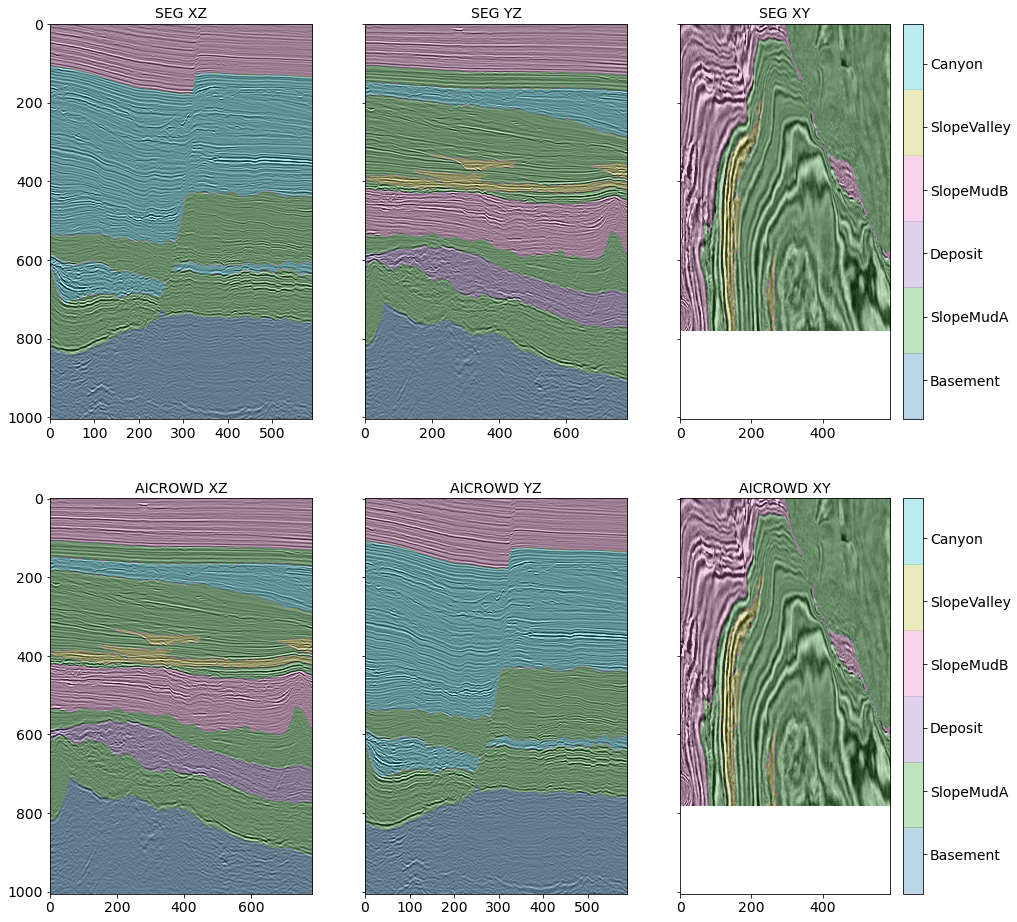

In [13]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(16, 16))

axs[0,0].imshow(img_seg[:,0].T, clim=(-1000,1000))
plot_label(lbl_seg[:,0].T, fig, axs[0,0], num_classes, cmap='tab10', **dict(alpha=0.3))
axs[0,0].set_title('SEG XZ')
axs[0,0].axis('tight')

axs[0,1].imshow(img_seg[0].T, clim=(-1000,1000))
plot_label(lbl_seg[0].T, fig, axs[0,1], num_classes, cmap='tab10', alpha=0.3)
axs[0,1].set_title('SEG YZ')
axs[0,1].axis('tight')

axs[0,2].imshow(img_seg[:,:,500].T, clim=(-1000,1000))
plot_label(lbl_seg[:,:,500].T, fig, axs[0,2], num_classes, labels=CLASS_NAMES, cmap='tab10', alpha=0.3)
axs[0,2].set_title('SEG XY')
axs[0,2].axis('tight')

axs[1,0].imshow(img_aic[:,:,0], clim=(-1000,1000))
plot_label(lbl_aic[:,:,0], fig, axs[1,0], num_classes, cmap='tab10', **dict(alpha=0.3))
axs[1,0].set_title('AICROWD XZ')
axs[1,0].axis('tight')

axs[1,1].imshow(img_aic[:,0], clim=(-1000,1000))
plot_label(lbl_aic[:,0], fig, axs[1,1], num_classes, cmap='tab10', alpha=0.3)
axs[1,1].set_title('AICROWD YZ')
axs[1,1].axis('tight')

axs[1,2].imshow(img_aic[500], clim=(-1000,1000))
plot_label(lbl_aic[500], fig, axs[1,2], num_classes, labels=CLASS_NAMES, cmap='tab10', alpha=0.3)
axs[1,2].set_title('AICROWD XY')
axs[1,2].axis('tight')

plt.show()

Classes are quite unbalanced!

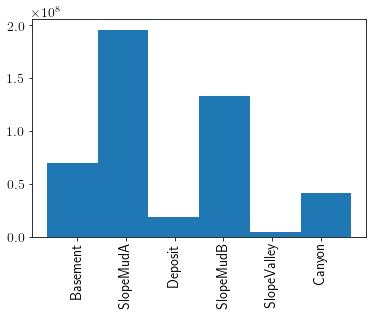

In [7]:
plt.hist(label.ravel(), num_classes)
plt.xticks(np.linspace(0.5,num_classes-1.5,num_classes), CLASS_NAMES, rotation=90)
plt.show()